# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
count = 1

lat = []
temp = []
humidity = []
clouds = []
wind = []
lon = []

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod'] != '404':
        print("Processing Record " + str(count) + " of Set 1 | " + city)
        #print(f"The weather API responded with: {response}.")
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp']) 
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        lon.append(response['coord']['lon'])
        count = count + 1
    

Processing Record 1 of Set 1 | onega
Processing Record 2 of Set 1 | payo
Processing Record 3 of Set 1 | hasaki
Processing Record 4 of Set 1 | yumen
Processing Record 5 of Set 1 | vardo
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | grindavik
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | houston
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | willmar
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | champerico
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | kitgum
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | fortuna
Processing Record 22 of Set 1 | namibe
Processing Record 23 of Set 1 | kapaa
Processing Record 24 of Set 1 | puerto ayora
Processing Record 25 of Set 1 | souillac
Processi

Processing Record 198 of Set 1 | sept-iles
Processing Record 199 of Set 1 | berlevag
Processing Record 200 of Set 1 | yanam
Processing Record 201 of Set 1 | uusikaupunki
Processing Record 202 of Set 1 | canchungo
Processing Record 203 of Set 1 | havre-saint-pierre
Processing Record 204 of Set 1 | pochutla
Processing Record 205 of Set 1 | salamiyah
Processing Record 206 of Set 1 | weligama
Processing Record 207 of Set 1 | kaitangata
Processing Record 208 of Set 1 | alice springs
Processing Record 209 of Set 1 | cozumel
Processing Record 210 of Set 1 | mailsi
Processing Record 211 of Set 1 | tallahassee
Processing Record 212 of Set 1 | teya
Processing Record 213 of Set 1 | mazagao
Processing Record 214 of Set 1 | alta
Processing Record 215 of Set 1 | lorengau
Processing Record 216 of Set 1 | haines junction
Processing Record 217 of Set 1 | provideniya
Processing Record 218 of Set 1 | pringsewu
Processing Record 219 of Set 1 | kushiro
Processing Record 220 of Set 1 | iturama
Processing Re

Processing Record 391 of Set 1 | saint-pierre
Processing Record 392 of Set 1 | atasu
Processing Record 393 of Set 1 | lieksa
Processing Record 394 of Set 1 | lucea
Processing Record 395 of Set 1 | nizwa
Processing Record 396 of Set 1 | tomatlan
Processing Record 397 of Set 1 | grand gaube
Processing Record 398 of Set 1 | tautira
Processing Record 399 of Set 1 | cayenne
Processing Record 400 of Set 1 | kuznechikha
Processing Record 401 of Set 1 | rudnichnyy
Processing Record 402 of Set 1 | panama city
Processing Record 403 of Set 1 | liverpool
Processing Record 404 of Set 1 | cabra
Processing Record 405 of Set 1 | daru
Processing Record 406 of Set 1 | luanda
Processing Record 407 of Set 1 | meulaboh
Processing Record 408 of Set 1 | abatskoye
Processing Record 409 of Set 1 | san pedro de macoris
Processing Record 410 of Set 1 | zhigansk
Processing Record 411 of Set 1 | wilmington
Processing Record 412 of Set 1 | del rio
Processing Record 413 of Set 1 | alyangula
Processing Record 414 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp,
    "humidity": humidity,
    "clouds": clouds,
    "wind": wind,
    "lon": lon
}
print (len(wind))
#weather_data = pd.DataFrame.from_dict(weather_dict)
weather_data = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in weather_dict.items() ]))
#weather_data = pd.DataFrame.from_dict(weather_dict, orient='index')
#weather_data.transpose()
weather_data.to_csv('weather.csv', index=False,header=True, encoding='utf-8')
weather_data

563


,city,lat,temp,humidity,clouds,wind,lon
0,onega,63.9061,35.55,94.0,100.0,11.12,38.1404
1,payo,-3.7508,90.14,52.0,57.0,2.68,103.6372
2,hasaki,35.7333,58.48,41.0,20.0,13.80,140.8333
3,yumen,40.2833,58.82,11.0,0.0,26.96,97.2000
4,vardo,70.3705,35.60,75.0,40.0,11.50,31.1107
...,...,...,...,...,...,...,...
621,buraydah,NaN,NaN,NaN,NaN,NaN,NaN
622,cockburn harbour,NaN,NaN,NaN,NaN,NaN,NaN
623,homer,NaN,NaN,NaN,NaN,NaN,NaN
624,assen,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
weather_data.describe()

,lat,temp,humidity,clouds,wind,lon
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000
mean,19.285484,62.030409,67.692718,53.049734,7.857833,17.563452
std,33.162254,20.783080,24.460653,39.254816,5.379648,90.653694
min,-54.800000,0.000000,7.000000,0.000000,0.360000,-175.200000
25%,-8.837850,44.990000,56.000000,10.000000,3.620000,-66.623750
50%,22.167400,64.600000,74.000000,61.000000,6.850000,25.747800
75%,46.604650,78.800000,87.000000,91.500000,10.650000,97.750000
max,78.218600,107.440000,100.000000,100.000000,31.070000,178.416700


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humidity_greater_100 = (weather_data["humidity"] > 100)[weather_data["city"]].unique()
print(humidity_greater_100)

[nan]


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

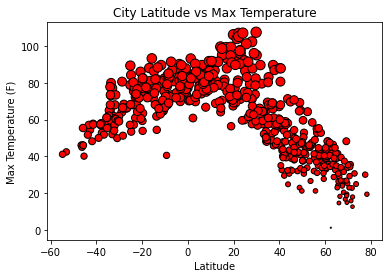

<Figure size 432x288 with 0 Axes>

In [10]:
lat = weather_data.iloc[:,1]
temp = weather_data.iloc[:,2]
plt.scatter(lat, temp, marker="o", facecolors="red"
           , edgecolors="black", s=temp)
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()
plt.savefig('latitude_temperature.png')

In [11]:
# This Latitude vs Temperature graph shows that as you go more north of the equator the temperature will fall. 

## Latitude vs. Humidity Plot

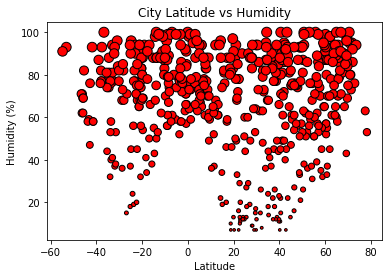

<Figure size 432x288 with 0 Axes>

In [12]:
lat = weather_data.iloc[:,1]
humidity = weather_data.iloc[:,3]
plt.scatter(lat, humidity, marker="o", facecolors="red"
           , edgecolors="black", s=humidity)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
plt.savefig('latitude_humidity.png')

In [13]:
# Majority of the cities have high humidity regardless of northern vs southern hemisphere

## Latitude vs. Cloudiness Plot

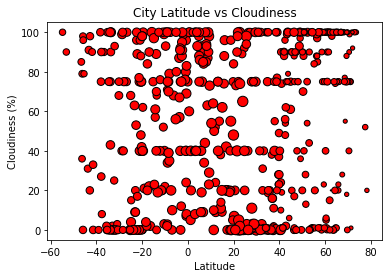

<Figure size 432x288 with 0 Axes>

In [14]:
lat = weather_data.iloc[:,1]
clouds = weather_data.iloc[:,4]
plt.scatter(lat, clouds, marker="o", facecolors="red"
           , edgecolors="black", s=temp)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
plt.savefig('latitude_cloudiness.png')

In [15]:
# Cloudiness vs latitude does not seem to show any correlation at all. 

## Latitude vs. Wind Speed Plot

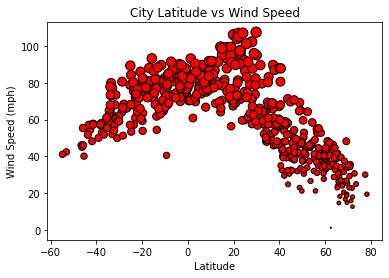

<Figure size 432x288 with 0 Axes>

In [16]:
lat = weather_data.iloc[:,1]
wind = weather_data.iloc[:,5]
plt.scatter(lat, temp, marker="o", facecolors="red"
           , edgecolors="black", s=temp)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
plt.savefig('latitude_wind_speed.png')

In [17]:
# Wind speed vs Latitude seems to be the same as temperature vs Latitude. The further north you get the wind seems to go down. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7035871768383186


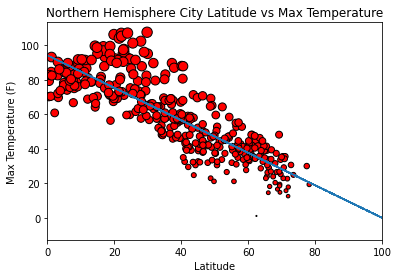

<Figure size 432x288 with 0 Axes>

In [18]:
northern_hemi = weather_data.loc[(weather_data['lat'] > 0)]
n_lat = northern_hemi.iloc[:,1]
n_temp = northern_hemi.iloc[:,2]
#print(f"The correlation coefficient between temp and latitiude is {round(linregress.pearsonr(northern_hemi['temp'],northern_hemi['lat'])[0],2)}")

vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(n_lat, n_temp)
vc_fit = vc_slope * n_temp + vc_int

correlation_matrix = np.corrcoef(n_lat, n_temp)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("The r-value is: " + str(r_squared))

plt.scatter(n_lat, n_temp, marker="o", facecolors="red"
           , edgecolors="black", s=n_temp)
plt.plot(n_temp,vc_fit,"--")
plt.title("Northern Hemisphere City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim([0, 100])
plt.show()
plt.savefig('northern_latitude_temperature.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5205172970350633


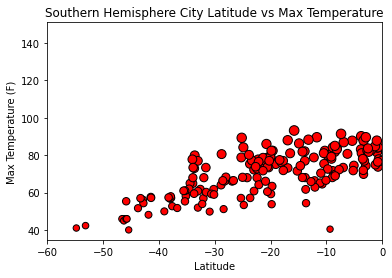

<Figure size 432x288 with 0 Axes>

In [19]:
southern_hemi = weather_data.loc[(weather_data['lat'] < 0)]
s_lat = southern_hemi.iloc[:,1]
s_temp = southern_hemi.iloc[:,2]

vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(s_lat, s_temp)
vc_fit = vc_slope * s_temp + vc_int

correlation_matrix = np.corrcoef(s_lat, s_temp)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("The r-value is: " + str(r_squared))

plt.scatter(s_lat, s_temp, marker="o", facecolors="red"
           , edgecolors="black", s=s_temp)
plt.plot(s_temp,vc_fit,"--")
plt.title("Southern Hemisphere City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim([-60, 0])
plt.show()
plt.savefig('southern_latitude_temperature.png')

In [20]:
# This shows that temperature does fall down as you get higher in the northern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02005107820671157


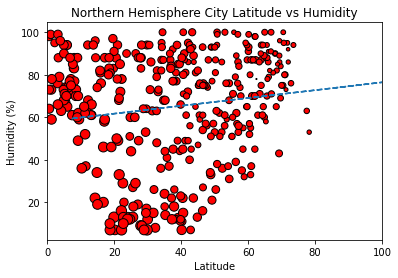

<Figure size 432x288 with 0 Axes>

In [21]:
n_lat = northern_hemi.iloc[:,1]
n_humid = northern_hemi.iloc[:,3]
#print(f"The correlation coefficient between temp and latitiude is {round(linregress.pearsonr(northern_hemi['temp'],northern_hemi['lat'])[0],2)}")

vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(n_lat, n_humid)
vc_fit = vc_slope * n_humid + vc_int

correlation_matrix = np.corrcoef(n_lat, n_humid)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("The r-value is: " + str(r_squared))

plt.scatter(n_lat, n_humid, marker="o", facecolors="red"
           , edgecolors="black", s=n_temp)
plt.plot(n_humid,vc_fit,"--")
plt.title("Northern Hemisphere City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim([0, 100])
plt.show()
plt.savefig('northern_latitude_humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.020134862282608558


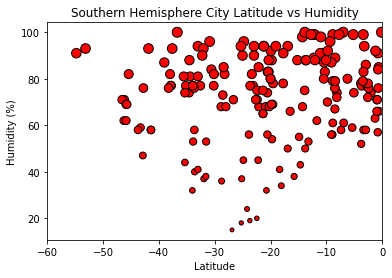

<Figure size 432x288 with 0 Axes>

In [22]:
s_lat = southern_hemi.iloc[:,1]
s_humidity = southern_hemi.iloc[:,3]

vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(s_lat, s_humidity)
#yvals = np.linspace(s_humidity.min(),s_humidity.max())
vc_fit = vc_slope * s_humidity + vc_int

correlation_matrix = np.corrcoef(s_lat, s_humidity)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("The r-value is: " + str(r_squared))

plt.scatter(s_lat, s_humidity, marker="o", facecolors="red"
           , edgecolors="black", s=s_humidity)
plt.plot(s_humidity,vc_fit,"--")
plt.title("Southern Hemisphere City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim([-60, 0])
plt.show()
plt.savefig('southern_latitude_humidity.png')

In [23]:
# There seems to be a linear regression with the northern hemisphere latitude vs humidity, but not with the Southern Hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.019025646648564515


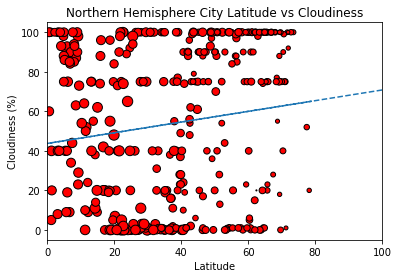

<Figure size 432x288 with 0 Axes>

In [24]:
n_lat = northern_hemi.iloc[:,1]
n_clouds = northern_hemi.iloc[:,4]
#print(f"The correlation coefficient between temp and latitiude is {round(linregress.pearsonr(northern_hemi['temp'],northern_hemi['lat'])[0],2)}")

vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(n_lat, n_clouds)
vc_fit = vc_slope * n_clouds + vc_int

correlation_matrix = np.corrcoef(n_lat, n_clouds)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("The r-value is: " + str(r_squared))

plt.scatter(n_lat, n_clouds, marker="o", facecolors="red"
           , edgecolors="black", s=n_temp)
plt.plot(n_clouds,vc_fit,"--")
plt.title("Northern Hemisphere City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim([0, 100])
plt.show()
plt.savefig('northern_latitude_cloud.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.009331225232819174


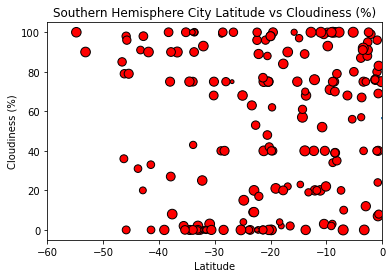

<Figure size 432x288 with 0 Axes>

In [25]:
s_lat = southern_hemi.iloc[:,1]
s_clouds = southern_hemi.iloc[:,4]

vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(s_lat, s_clouds)
#yvals = np.linspace(s_humidity.min(),s_humidity.max())
vc_fit = vc_slope * s_clouds + vc_int

correlation_matrix = np.corrcoef(s_lat, s_clouds)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("The r-value is: " + str(r_squared))

plt.scatter(s_lat, s_clouds, marker="o", facecolors="red"
           , edgecolors="black", s=s_humidity)
plt.plot(s_clouds,vc_fit,"--")
plt.title("Southern Hemisphere City Latitude vs Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim([-60, 0])
plt.show()
plt.savefig('southern_latitude_cloud.png')

In [26]:
# Cloudiness increases in the northern hemisphere as you go more north, but there seems to be no relationship in the southern hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04518293136832176


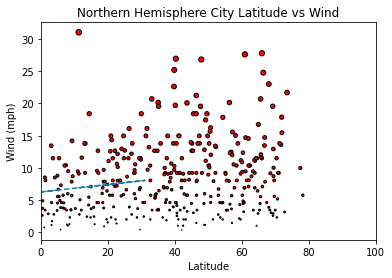

<Figure size 432x288 with 0 Axes>

In [27]:
n_lat = northern_hemi.iloc[:,1]
n_wind = northern_hemi.iloc[:,5]
#print(f"The correlation coefficient between temp and latitiude is {round(linregress.pearsonr(northern_hemi['temp'],northern_hemi['lat'])[0],2)}")

vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(n_lat, n_wind)
vc_fit = vc_slope * n_wind + vc_int

correlation_matrix = np.corrcoef(n_lat, n_wind)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("The r-value is: " + str(r_squared))

plt.scatter(n_lat, n_wind, marker="o", facecolors="red"
           , edgecolors="black", s=n_wind)
plt.plot(n_wind,vc_fit,"--")
plt.title("Northern Hemisphere City Latitude vs Wind")
plt.xlabel("Latitude")
plt.ylabel("Wind (mph)")
plt.xlim([0, 100])
plt.show()
plt.savefig('northern_latitude_wind.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.009331225232819174


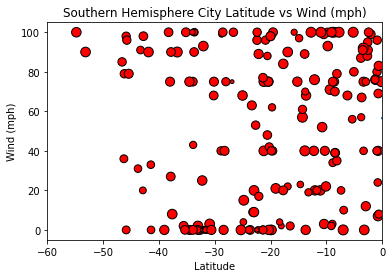

<Figure size 432x288 with 0 Axes>

In [28]:
s_lat = southern_hemi.iloc[:,1]
s_wind = southern_hemi.iloc[:,4]

vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(s_lat, s_wind)
#yvals = np.linspace(s_humidity.min(),s_humidity.max())
vc_fit = vc_slope * s_wind + vc_int

correlation_matrix = np.corrcoef(s_lat, s_wind)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("The r-value is: " + str(r_squared))

plt.scatter(s_lat, s_wind, marker="o", facecolors="red"
           , edgecolors="black", s=s_humidity)
plt.plot(s_wind,vc_fit,"--")
plt.title("Southern Hemisphere City Latitude vs Wind (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind (mph)")
plt.xlim([-60, 0])
plt.show()
plt.savefig('southern_latitude_wind.png')

In [29]:
# There seems to be no linear relationship between wind and latitude. 